# Credit Card Fraud Detection 

## Import the Libraries: 

In [6]:
!pip install tensorflow

In [7]:
!pip install tensorflow keras

In [8]:
!pip install pandas seaborn matplotlib

In [9]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

## Load the data:

In [11]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Exploration:

In [13]:
df.shape

(284807, 31)

In [14]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [16]:
df.isnull().values.any()

False

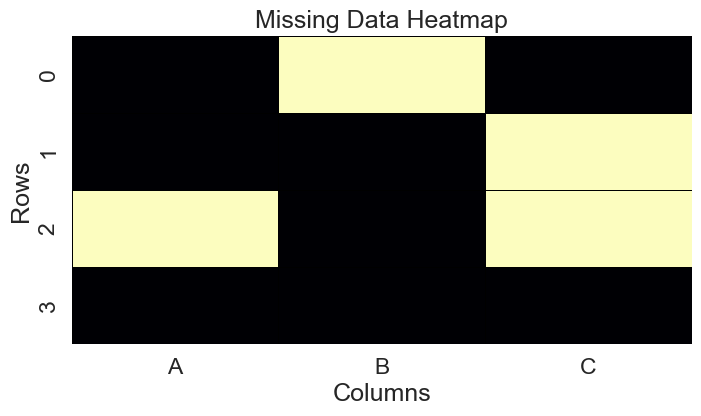

In [17]:
data = pd.DataFrame({
    'A': [1, 2, None, 4],
    'B': [None, 2, 3, 4],
    'C': [1, None, None, 4]
})

# Visualize missing data
plt.figure(figsize=(8, 4))  # Set figure size for better visibility
sns.heatmap(data.isnull(), cmap='magma', cbar=False, linewidths=0.5, linecolor='black')
plt.title('Missing Data Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [18]:
data.describe()

,A,B,C
count,3.000000,3.0,2.00000
mean,2.333333,3.0,2.50000
std,1.527525,1.0,2.12132
min,1.000000,2.0,1.00000
25%,1.500000,2.5,1.75000
50%,2.000000,3.0,2.50000
75%,3.000000,3.5,3.25000
max,4.000000,4.0,4.00000


In [19]:
print(data.columns)

Index(['A', 'B', 'C'], dtype='object')


In [20]:
frauds = df[df.Class == 1]
normal = df[df.Class == 0]

In [21]:
frauds.shape

(492, 31)

In [22]:
normal.shape

(284315, 31)

In [23]:
frauds.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [24]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

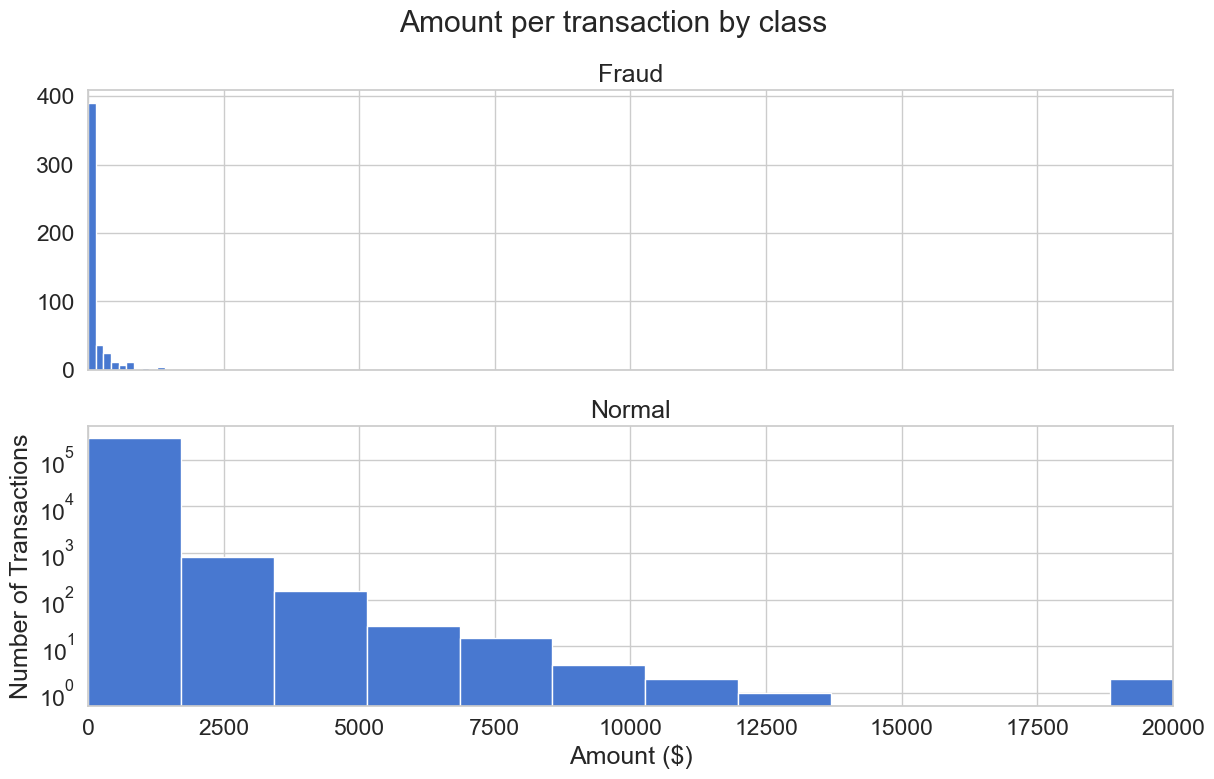

In [25]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')

bins = 15

ax1.hist(frauds.Amount, bins = bins)
ax1.set_title('Fraud')

ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

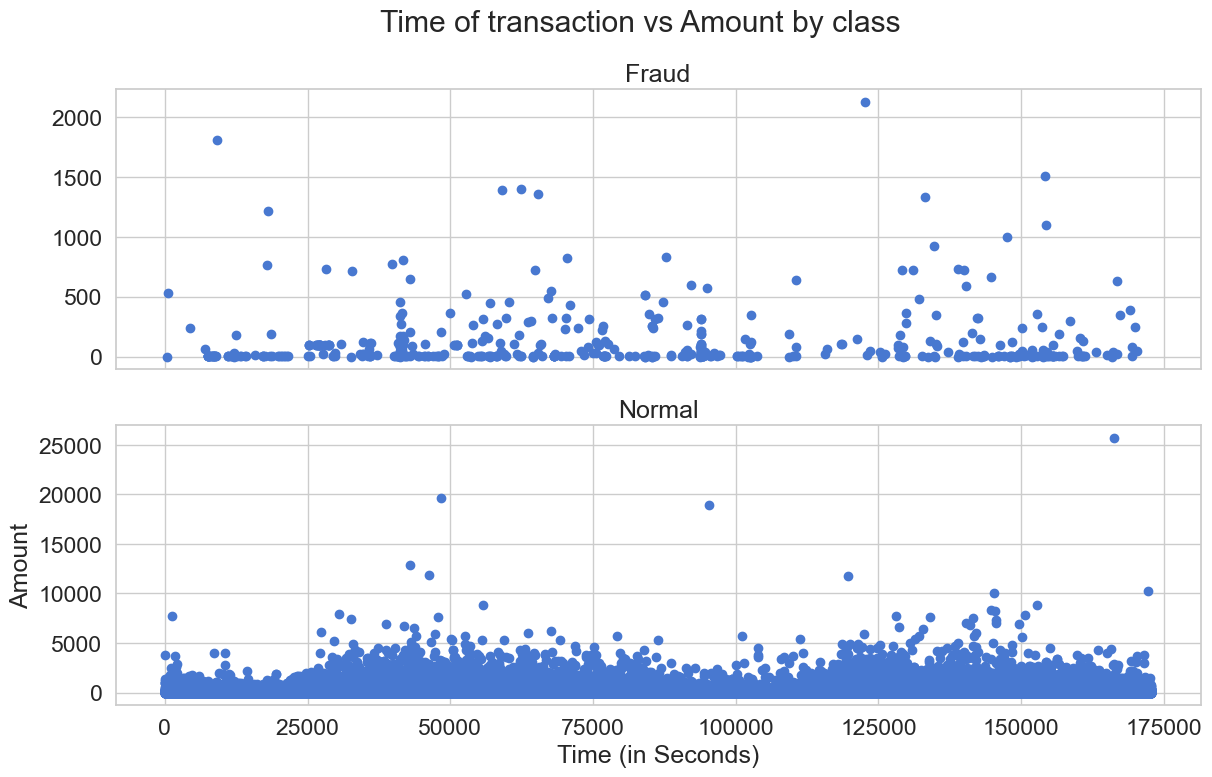

In [26]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(frauds.Time, frauds.Amount)
ax1.set_title('Fraud')

ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

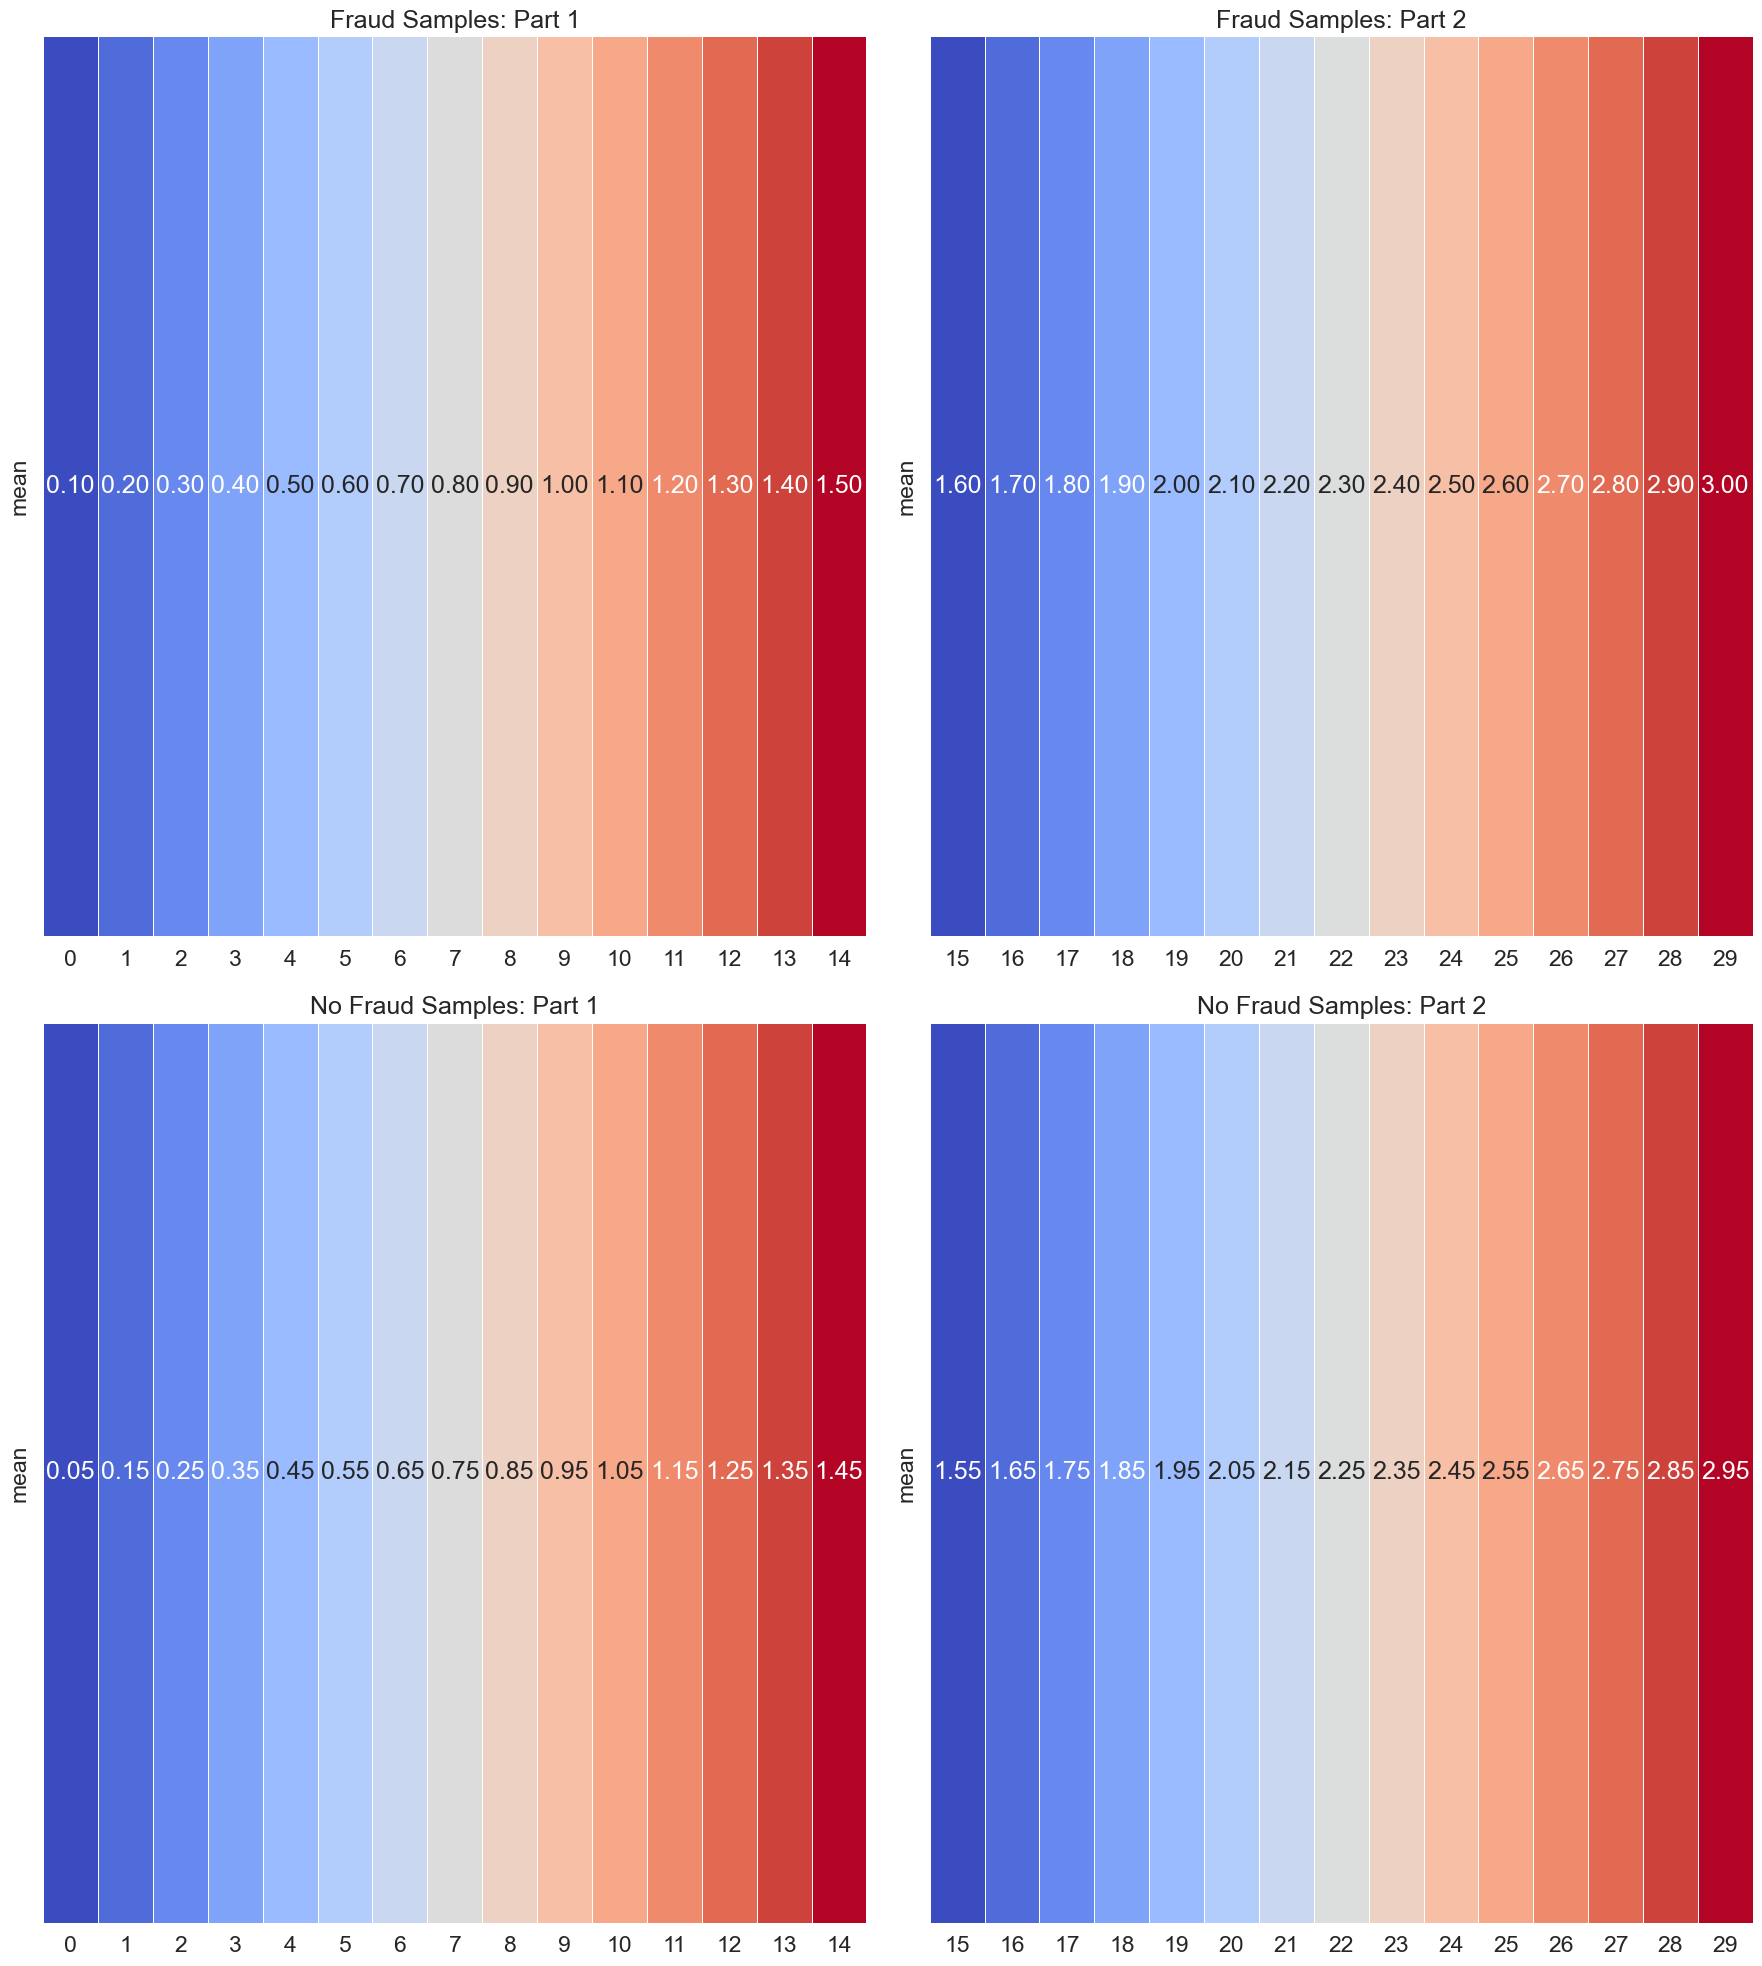

In [27]:
# Sample DataFrames (replace these with your actual data)
fraud = pd.DataFrame({
    'mean': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
             1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0,
             2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0]
})

nofraud = pd.DataFrame({
    'mean': [0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95,
              1.05, 1.15, 1.25, 1.35, 1.45, 1.55, 1.65, 1.75, 1.85, 1.95,
              2.05, 2.15, 2.25, 2.35, 2.45, 2.55, 2.65, 2.75, 2.85, 2.95]
})

# Verify if data exists for the required range
fraud_rows = fraud.shape[0]
nofraud_rows = nofraud.shape[0]

# Adjust slicing to available data
fraud_part1 = fraud[['mean']].iloc[:min(15, fraud_rows)]
fraud_part2 = fraud[['mean']].iloc[15:min(30, fraud_rows)]
nofraud_part1 = nofraud[['mean']].iloc[:min(15, nofraud_rows)]
nofraud_part2 = nofraud[['mean']].iloc[15:min(30, nofraud_rows)]

fig, ax = plt.subplots(2, 2, figsize=(18, 20))

# Fraud Samples: Part 1
if not fraud_part1.empty:
    sns.heatmap(fraud_part1.T, annot=True, cmap='coolwarm', linewidths=0.5, cbar=False, fmt='.2f', ax=ax[0, 0])
    ax[0, 0].set_title('Fraud Samples: Part 1')

# Fraud Samples: Part 2
if not fraud_part2.empty:
    sns.heatmap(fraud_part2.T, annot=True, cmap='coolwarm', linewidths=0.5, cbar=False, fmt='.2f', ax=ax[0, 1])
    ax[0, 1].set_title('Fraud Samples: Part 2')

# No Fraud Samples: Part 1
if not nofraud_part1.empty:
    sns.heatmap(nofraud_part1.T, annot=True, cmap='coolwarm', linewidths=0.5, cbar=False, fmt='.2f', ax=ax[1, 0])
    ax[1, 0].set_title('No Fraud Samples: Part 1')

# No Fraud Samples: Part 2
if not nofraud_part2.empty:
    sns.heatmap(nofraud_part2.T, annot=True, cmap='coolwarm', linewidths=0.5, cbar=False, fmt='.2f', ax=ax[1, 1])
    ax[1, 1].set_title('No Fraud Samples: Part 2')

plt.tight_layout()
plt.show()

## Preparing the Data:

In [29]:
from sklearn.preprocessing import StandardScaler

data = df.drop(['Time'], axis=1)

data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

In [30]:
X_train, X_test = train_test_split(data, test_size=0.2, random_state=RANDOM_SEED)
X_train = X_train[X_train.Class == 0]
X_train = X_train.drop(['Class'], axis=1)

y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)

X_train = X_train.values
X_test = X_test.values

In [31]:
X_train.shape

(227451, 29)

## Bulding the model:

In [33]:
input_dim = X_train.shape[1]
encoding_dim = 14

In [34]:
input_layer = Input(shape=(input_dim, ))

encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)

decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)

In [35]:
# Training parameters
nb_epoch = 100
batch_size = 32

# Compile the autoencoder model
autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])

# Callbacks to save the best model and log training metrics
checkpointer = ModelCheckpoint(filepath="my_model.keras",
                               verbose=0,
                               save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',
                          write_graph=True,
                          write_images=True)

# Fit the autoencoder to the data
history = autoencoder.fit(X_train, X_train,
                          epochs=nb_epoch,
                          batch_size=batch_size,
                          shuffle=True,
                          validation_data=(X_test, X_test),
                          verbose=1,
                          callbacks=[checkpointer, tensorboard]).history


Epoch 1/100
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 5s 624us/step - accuracy: 0.4943 - loss: 0.8660 - val_accuracy: 0.6207 - val_loss: 0.7896
Epoch 2/100
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 4s 612us/step - accuracy: 0.6319 - loss: 0.7686 - val_accuracy: 0.6445 - val_loss: 0.7746
Epoch 3/100
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 4s 601us/step - accuracy: 0.6402 - loss: 0.7323 - val_accuracy: 0.6481 - val_loss: 0.7675
Epoch 4/100
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 4s 594us/step - accuracy: 0.6461 - loss: 0.7263 - val_accuracy: 0.6478 - val_loss: 0.7653
Epoch 5/100
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 4s 563us/step - accuracy: 0.6521 - loss: 0.7210 - val_accuracy: 0.6507 - val_loss: 0.7661
Epoch 6/100
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 4s 559us/step - accuracy: 0.6531 - loss: 0.7166 - val_accuracy: 0.6523 - val_loss: 0.7631
Epoch 7/100
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 4s 570us/step - accuracy: 0.6539 - loss: 0.7187 - val_accuracy: 0.6606 - val_loss: 0.7605
Epoch 8/100
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 4s 570us/step - accuracy: 

In [36]:
autoencoder = load_model('my_model.keras')

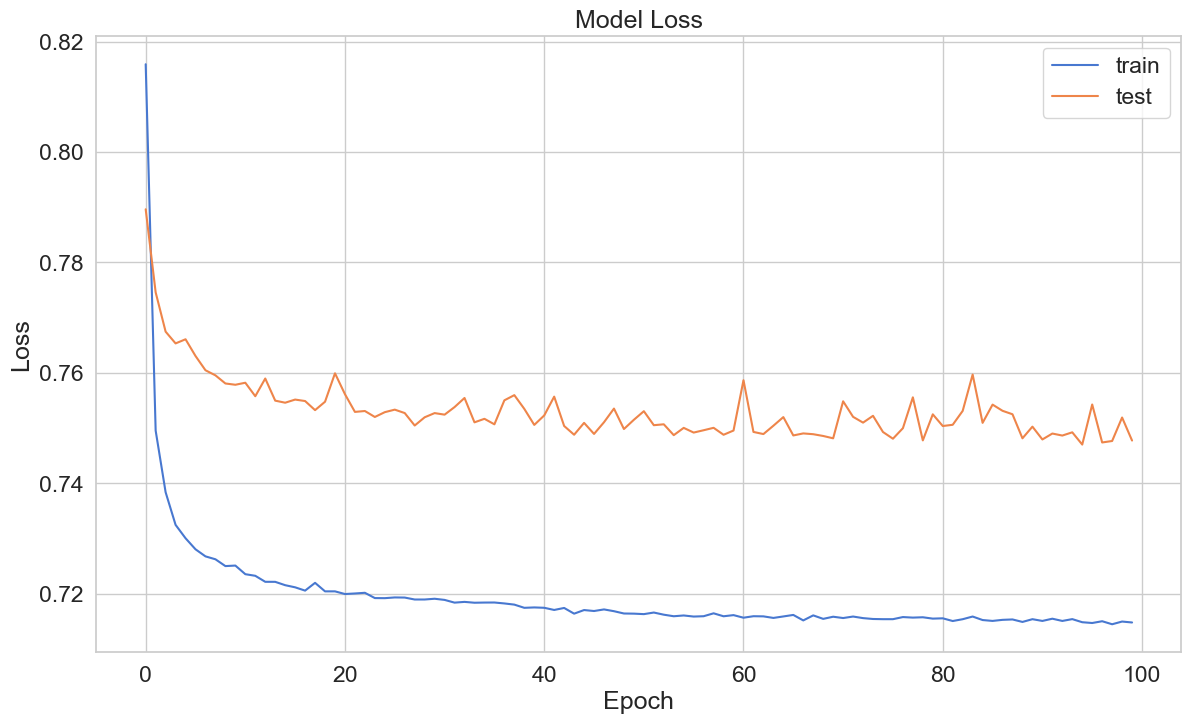

In [37]:
plt.plot(history['loss'], label='train')
plt.plot(history['val_loss'], label='test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [38]:
predictions = autoencoder.predict(X_test)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 0s 215us/step


In [39]:
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})

In [40]:
error_df.describe()

,reconstruction_error,true_class
count,56962.000000,56962.000000
mean,0.738692,0.001720
std,3.481201,0.041443
min,0.040089,0.000000
25%,0.245006,0.000000
50%,0.387163,0.000000
75%,0.622988,0.000000
max,274.207748,1.000000


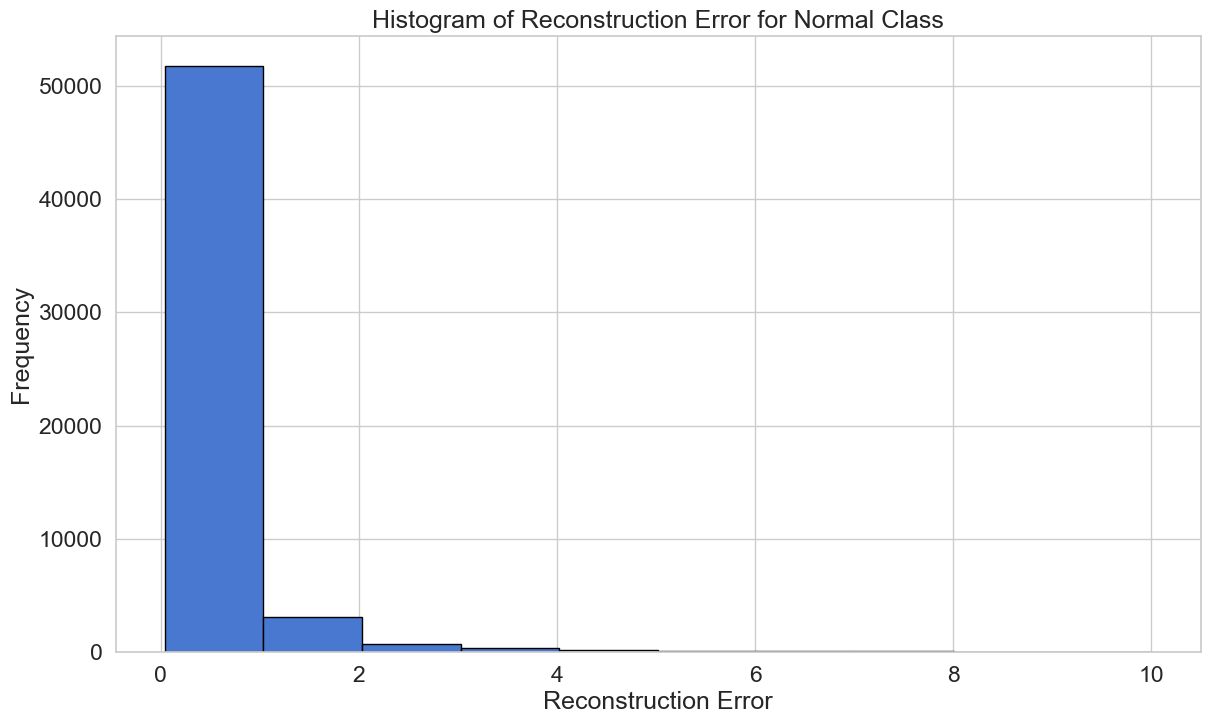

In [41]:
normal_error_df = error_df[(error_df['true_class'] == 0) & (error_df['reconstruction_error'] < 10)]

# Plotting the histogram
plt.figure()
plt.hist(normal_error_df['reconstruction_error'].values, bins=10, edgecolor='black')
plt.title('Histogram of Reconstruction Error for Normal Class')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.show()

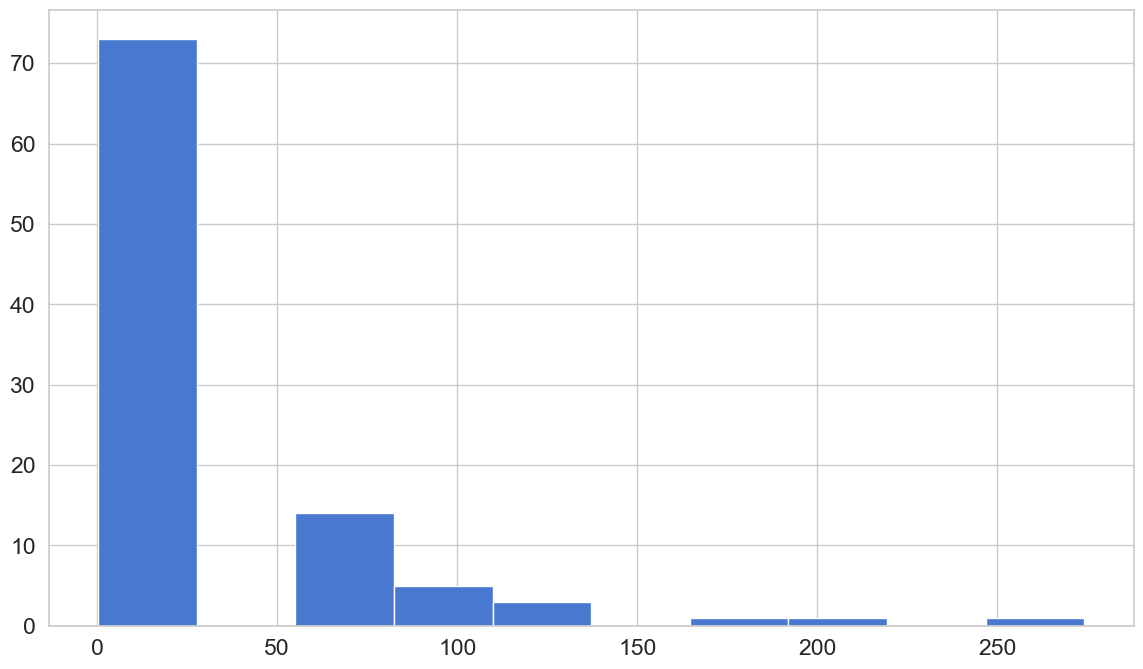

In [42]:
fig = plt.figure()
ax = fig.add_subplot(111)
fraud_error_df = error_df[error_df['true_class'] == 1]
ax.hist(fraud_error_df['reconstruction_error'].values, bins=10)
plt.show()

In [43]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

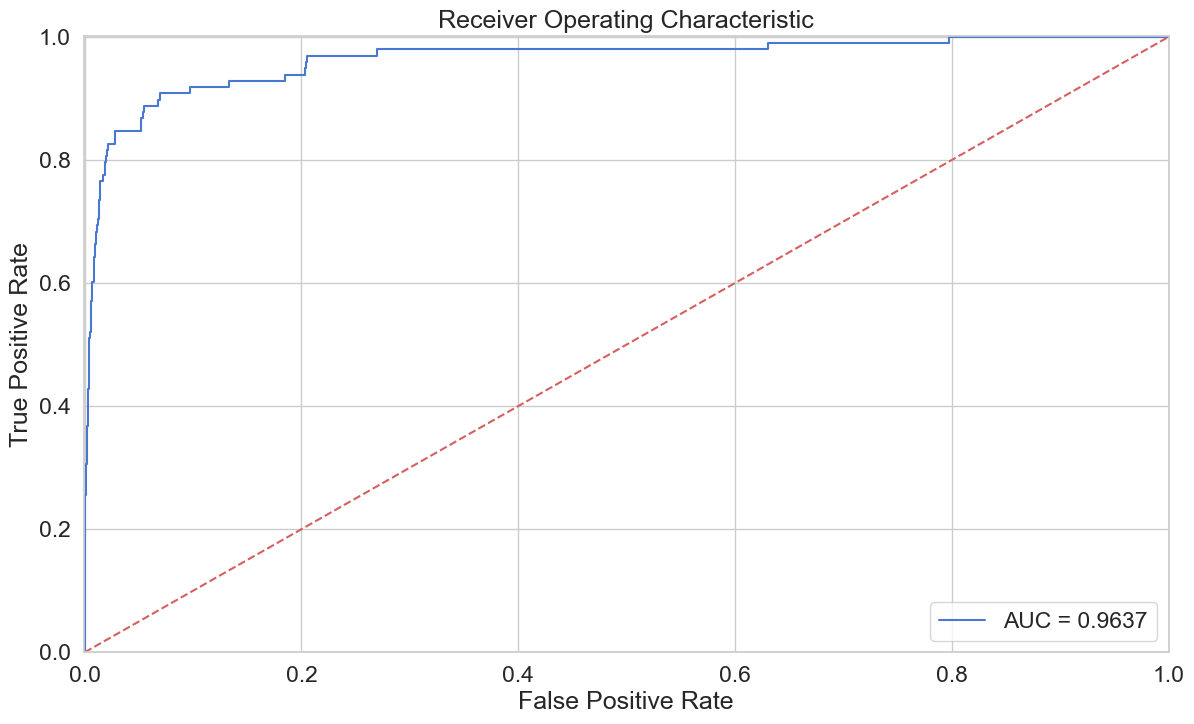

In [44]:
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

## Precision vs Recall:

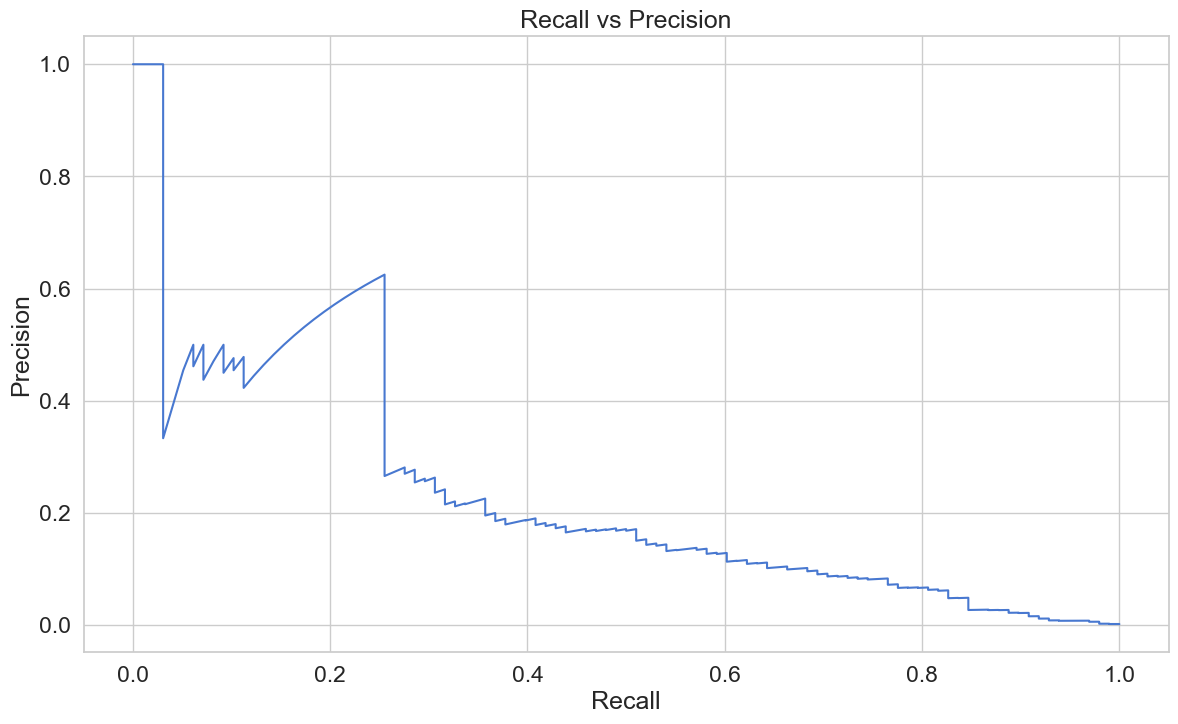

In [46]:
precision, recall, th = precision_recall_curve(error_df.true_class, error_df.reconstruction_error)
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

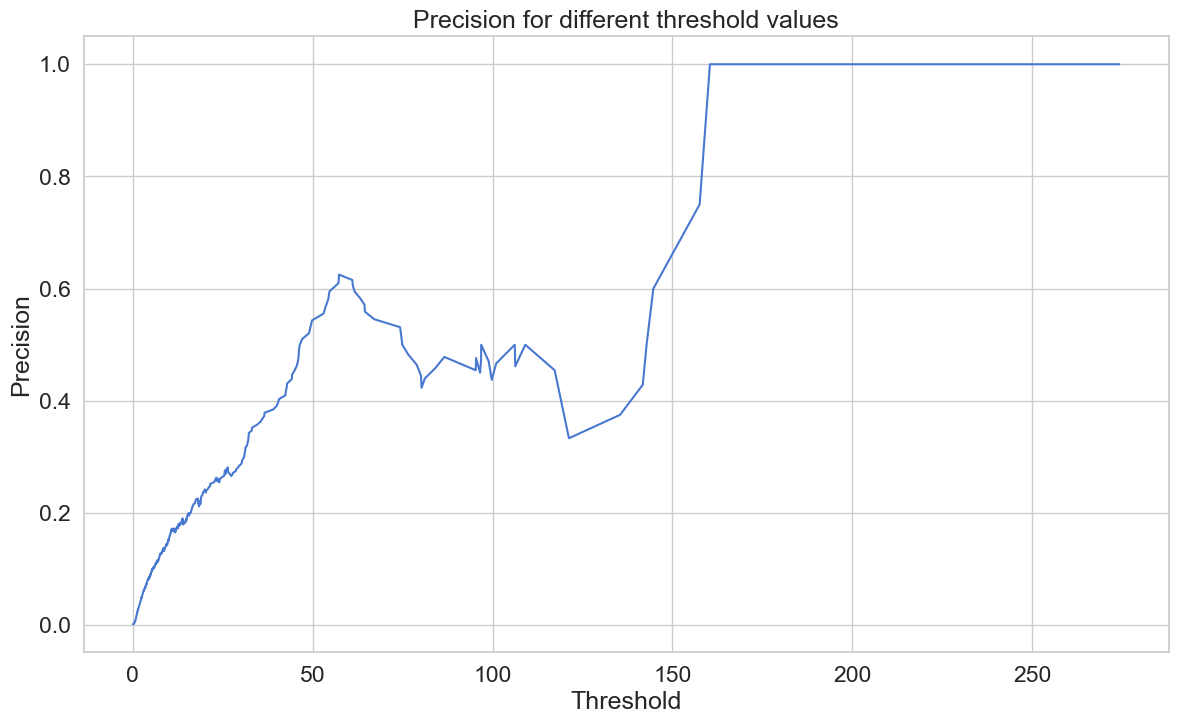

In [47]:
plt.plot(th, precision[1:], 'b', label='Threshold-Precision curve')
plt.title('Precision for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.show()

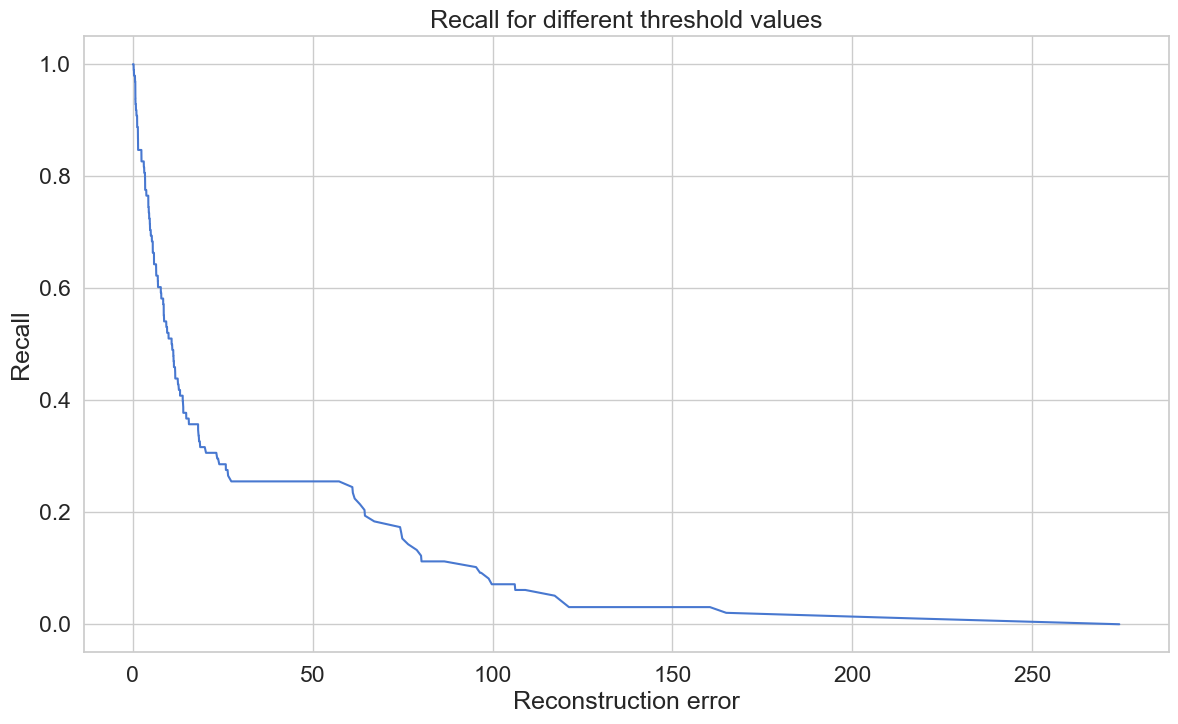

In [48]:
plt.plot(th, recall[1:], 'b', label='Threshold-Recall curve')
plt.title('Recall for different threshold values')
plt.xlabel('Reconstruction error')
plt.ylabel('Recall')
plt.show()

## Prediction:

In [50]:
threshold = 2.9

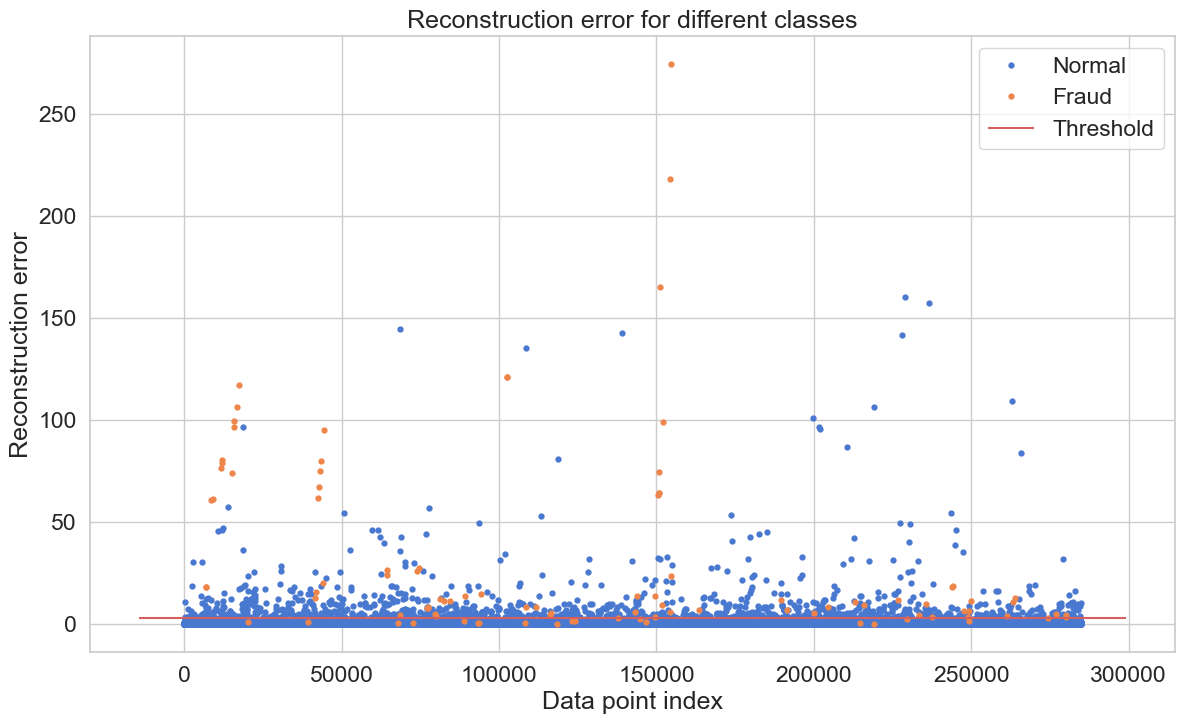

In [51]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

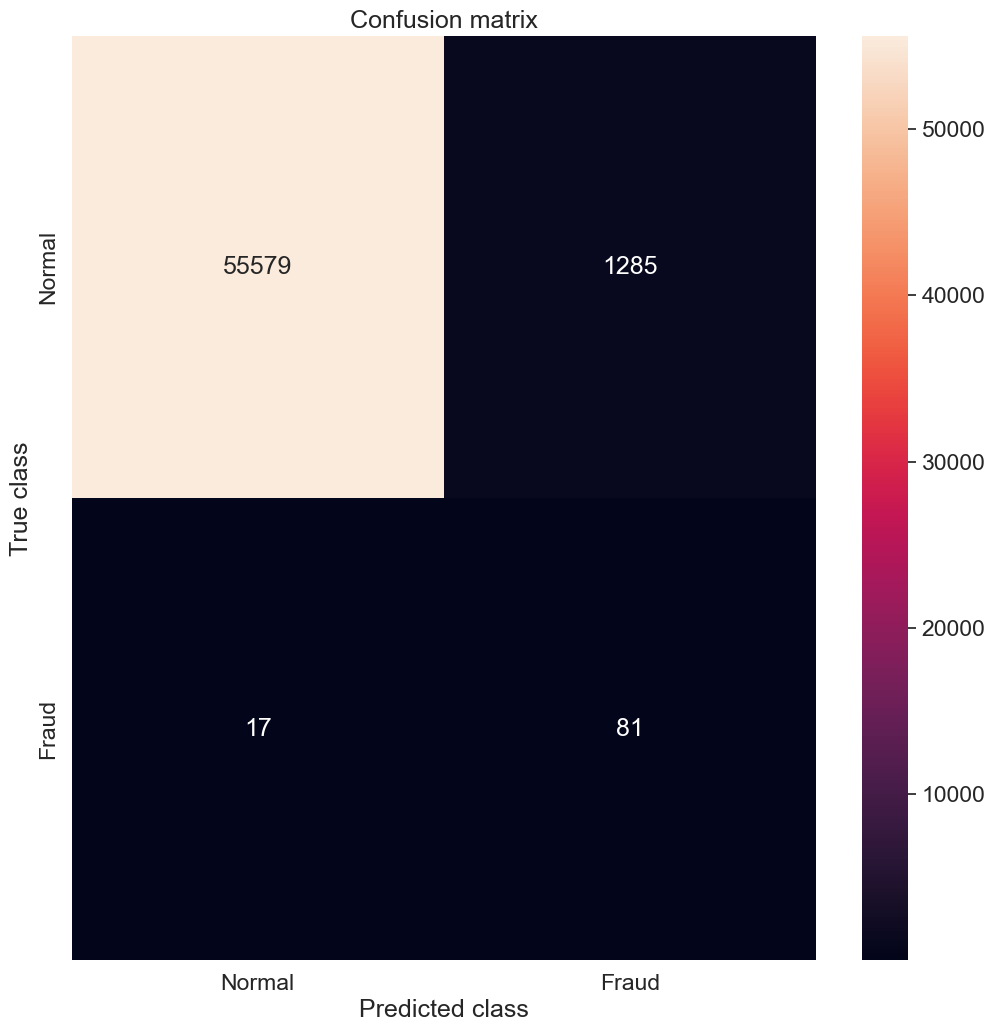

In [52]:
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [53]:
!pip install streamlit

In [54]:
!pip install ipywidgets

In [55]:
!pip show dash
!pip show dash-bootstrap-components

Name: dash
Version: 2.18.2
Summary: A Python framework for building reactive web-apps. Developed by Plotly.
Home-page: https://plotly.com/dash
Author: Chris Parmer
Author-email: chris@plotly.com
License: MIT
Location: /opt/anaconda3/lib/python3.12/site-packages
Requires: dash-core-components, dash-html-components, dash-table, Flask, importlib-metadata, nest-asyncio, plotly, requests, retrying, setuptools, typing-extensions, Werkzeug
Required-by: dash-bootstrap-components
Name: dash-bootstrap-components
Version: 1.7.1
Summary: Bootstrap themed components for use in Plotly Dash
Home-page: https://dash-bootstrap-components.opensource.faculty.ai/
Author: Faculty Science Ltd, Pascal Bugnion
Author-email: Tom Begley <tomcbegley@gmail.com>
License: Apache License
                        Version 2.0, January 2004
                    http://www.apache.org/licenses/

TERMS AND CONDITIONS FOR USE, REPRODUCTION, AND DISTRIBUTION

1. Definitions.

  "License" shall mean the terms and conditions for

In [56]:
!pip install dash dash-bootstrap-components plotly

In [57]:
!pip install plotly

In [2]:
#!/usr/bin/env python
# coding: utf-8

import dash
from dash import dcc, html, Input, Output
import dash_bootstrap_components as dbc
import pandas as pd
import plotly.express as px

# Sample data creation (replace this with your actual data)
data = pd.DataFrame({
    'Class': [0, 1, 0, 0, 1, 0, 1, 0, 0, 0],
    'Amount': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550],
    'Time': pd.date_range(start='1/1/2021', periods=10, freq='H')  # Use uppercase 'H' for hours
})

# Initialize Dash App
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# Layout
app.layout = dbc.Container(
    [
        dbc.Row(
            dbc.Col(
                html.H1("Fraud Detection Dashboard", className="text-center text-primary mb-4")
            )
        ),
        dbc.Row(
            [
                dbc.Col(dbc.Card([
                    dbc.CardHeader("Total Transactions"),
                    dbc.CardBody(html.H4(f"{len(data):,}", className="text-success"))
                ], color="light")),
                dbc.Col(dbc.Card([
                    dbc.CardHeader("Fraudulent Transactions"),
                    dbc.CardBody(html.H4(f"{data[data['Class'] == 1].shape[0]:,}", className="text-danger"))
                ], color="light")),
                dbc.Col(dbc.Card([
                    dbc.CardHeader("Fraud Percentage"),
                    dbc.CardBody(html.H4(f"{(data[data['Class'] == 1].shape[0] / len(data)) * 100:.2f}%", className="text-info"))
                ], color="light")),
            ],
            className="mb-4"
        ),
        dbc.Row(
            [
                dbc.Col(dcc.Graph(
                    id="pie-chart",
                    figure=px.pie(
                        values=data['Class'].value_counts(),
                        names=["Legitimate", "Fraudulent"],
                        title="Transaction Distribution",
                        color_discrete_sequence=["green", "red"]
                    )
                ), md=6),
                dbc.Col(dcc.Graph(
                    id="amount-boxplot",
                    figure=px.box(
                        data, x="Class", y="Amount",
                        title="Transaction Amount by Class",
                        labels={"Class": "Transaction Type", "Amount": "Transaction Amount"},
                        color="Class",
                        color_discrete_map={0: "green", 1: "red"}
                    )
                ), md=6)
            ]
        ),
        dbc.Row(
            dbc.Col(
                [
                    html.H5("Transaction Search"),
                    dcc.Input(id="search-id", type="number", placeholder="Enter Transaction Index", className="mb-2"),
                    html.Div(id="transaction-details", className="mt-2")
                ]
            )
        ),
        dbc.Row(
            [
                html.Div([
                    html.Label("Select Year:"),
                    dcc.Dropdown(
                        id='select-year',
                        options=[{'label': str(year), 'value': year} for year in range(2021, 2022)],  # Adjust years as needed
                        value=2021,
                        placeholder='Select a year'
                    )
                ]),
            ]
        ),
        dbc.Row(html.Div(id='yearly-fraud-stats', className='output-container', style={'margin': '20px'}))
    ],
    fluid=True
)

# Callbacks for Interactivity
@app.callback(
    Output("transaction-details", "children"),
    [Input("search-id", "value")]
)
def display_transaction_details(index):
    if index is not None and 0 <= index < len(data):
        transaction = data.iloc[index]
        return html.Div([
            html.P(f"Transaction ID: {index}"),
            html.P(f"Time: {transaction['Time']}"),
            html.P(f"Amount: {transaction['Amount']}"),
            html.P(f"Class: {'Fraudulent' if transaction['Class'] == 1 else 'Legitimate'}")
        ])
    return "Invalid Transaction ID or Out of Range."

# Callback for yearly fraud statistics
@app.callback(
    Output('yearly-fraud-stats', 'children'),
    Input('select-year', 'value')
)
def update_yearly_statistics(selected_year):
    if selected_year:
        yearly_data = data[data['Time'].dt.year == selected_year]
        total_yearly = len(yearly_data)
        fraudulent_yearly = yearly_data[yearly_data['Class'] == 1].shape[0]
        fraud_percentage_yearly = (fraudulent_yearly / total_yearly) * 100 if total_yearly > 0 else 0

        return html.Div([
            html.H4(f"Statistics for {selected_year}", className="text-center"),
            html.P(f"Total Transactions: {total_yearly:,}"),
            html.P(f"Fraudulent Transactions: {fraudulent_yearly:,}"),
            html.P(f"Fraud Percentage: {fraud_percentage_yearly:.2f}%")
        ])
    return "No data for the selected year."

# Run App
if __name__ == '__main__':
    app.run_server(debug=True)


/var/folders/lv/b2xb7dqs5v570_hrlbhxr3240000gn/T/ipykernel_26769/1798595401.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  'Time': pd.date_range(start='1/1/2021', periods=10, freq='H')  # Use uppercase 'H' for hours


In [111]:
!pip install tabpy

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.3/624.3 kB 4.8 MB/s eta 0:00:00
  Created wheel for tabpy: filename=tabpy-2.13.0-py2.py3-none-any.whl size=122700 sha256=9b2c20b4119471bf24f0695a62b31a1f8caef38a99a174d674f04fd44fb0acac
  Stored in directory: /Users/k.baladithya/Library/Caches/pip/wheels/a9/6d/8c/1e52e6bdbfdcf992c9e64d54f059cf99c1b7cf759c3f7b43ad
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13749 sha256=836cad43618ff5c3c33d1d39b15e7367718b81cc1a5d5e78e1fc59803ec1ba70
  Stored in directory: /Users/k.baladithya/Library/Caches/pip/wheels/1a/bf/a1/4cee4f7678c68c5875ca89eaccf460593539805c3906722228
Successfully built tabpy docopt


## Conclusion:

### The credit card fraud detection project analyzed transaction data from a two-day period, consisting of 284,807 transactions, with only 492 labeled as fraudulent, reflecting a severe class imbalance. All features except Time and Amount were transformed using PCA for privacy. The analysis highlighted patterns in fraudulent transactions and addressed challenges such as the dataset’s imbalance using techniques like oversampling and SMOTE. Machine learning models were trained and evaluated to prioritize recall, ensuring effective identification of fraudulent cases while minimizing false negatives. The project underscores the importance of advanced techniques in mitigating financial fraud and enhancing transaction security.

## It's Done By K.Baladithya. An aspiring data science learner.